# Next Word Prediction 

In [1]:
!pip install numpy
!pip install tensorflow
!pip install keras
!pip install nltk

'0' is not recognized as an internal or external command,
operable program or batch file.


'0' is not recognized as an internal or external command,
operable program or batch file.


'0' is not recognized as an internal or external command,
operable program or batch file.


'0' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import numpy as np
from nltk.tokenize import RegexpTokenizer
from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers.core import Dense, Activation
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

In [3]:

text = open('1661-0.txt' ,encoding ='UTF-8').read().lower()
print('corpus length:', len(text))

corpus length: 581888


In [4]:
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(text)

In [5]:
unique_words = np.unique(words)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))

In [6]:
WORD_LENGTH = 5
prev_words = []
next_words = []
for i in range(len(words) - WORD_LENGTH):
    prev_words.append(words[i:i + WORD_LENGTH])
    next_words.append(words[i + WORD_LENGTH])
print(prev_words[0])
print(next_words[0])

['project', 'gutenberg', 's', 'the', 'adventures']
of


In [7]:
X = np.zeros((len(prev_words), WORD_LENGTH, len(unique_words)), dtype=bool)
Y = np.zeros((len(next_words), len(unique_words)), dtype=bool)
for i, each_words in enumerate(prev_words):
    for j, each_word in enumerate(each_words):
        X[i, j, unique_word_index[each_word]] = 1
    Y[i, unique_word_index[next_words[i]]] = 1

In [8]:
print(X[0][0])

[False False False ... False False False]


In [9]:
model = Sequential()
model.add(LSTM(128, input_shape=(WORD_LENGTH, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))


In [10]:
optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=10, shuffle=True).history

C:\Users\Srilatha\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/10
811/811 [==============================] - 374s 455ms/step - loss: 6.0236 - accuracy: 0.1072 - val_loss: 7.0632 - val_accuracy: 0.0961
Epoch 2/10
811/811 [==============================] - 295s 364ms/step - loss: 5.7704 - accuracy: 0.1473 - val_loss: 7.9336 - val_accuracy: 0.1049
Epoch 3/10
811/811 [==============================] - 254s 313ms/step - loss: 5.7674 - accuracy: 0.1751 - val_loss: 8.2408 - val_accuracy: 0.1080
Epoch 4/10
811/811 [==============================] - 277s 341ms/step - loss: 5.4505 - accuracy: 0.2082 - val_loss: 8.3440 - val_accuracy: 0.0976
Epoch 5/10
811/811 [==============================] - 359s 443ms/step - loss: 5.1485 - accuracy: 0.2483 - val_loss: 8.4252 - val_accuracy: 0.0895
Epoch 6/10
811/811 [==============================] - 289s 356ms/step - loss: 4.8722 - accuracy: 0.2899 - val_loss: 8.4766 - val_accuracy: 0.0884
Epoch 7/10
811/811 [==============================] - 292s 360ms/step - loss: 4.6262 - accuracy: 0.3304 - val_loss: 8.8095 -

In [11]:
model.save('keras_next_word_model.h5')
pickle.dump(history, open("history.p", "wb"))
model = load_model('keras_next_word_model.h5')
history = pickle.load(open("history.p", "rb"))

In [12]:
history

{'loss': [6.023590087890625,
  5.770409107208252,
  5.76743221282959,
  5.4504828453063965,
  5.148451805114746,
  4.872182369232178,
  4.626245498657227,
  4.4040207862854,
  4.229263782501221,
  4.07705545425415],
 'accuracy': [0.10718106478452682,
  0.1473221629858017,
  0.17514625191688538,
  0.20821326971054077,
  0.24831581115722656,
  0.28989291191101074,
  0.33037135004997253,
  0.37173643708229065,
  0.4072225093841553,
  0.4387185573577881],
 'val_loss': [7.063177108764648,
  7.933615684509277,
  8.240761756896973,
  8.343971252441406,
  8.425188064575195,
  8.476600646972656,
  8.80952262878418,
  8.848038673400879,
  8.820497512817383,
  9.031451225280762],
 'val_accuracy': [0.09611863642930984,
  0.10490662604570389,
  0.10801903903484344,
  0.09758330136537552,
  0.08952764421701431,
  0.08842914551496506,
  0.08348590135574341,
  0.08696448057889938,
  0.08220431953668594,
  0.0794580727815628]}

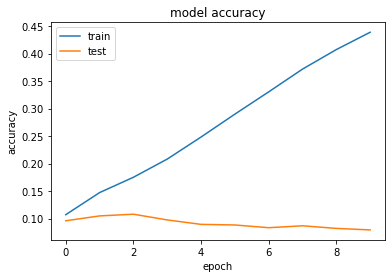

In [13]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

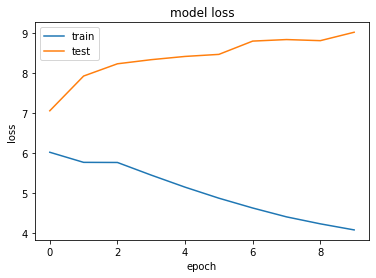

In [14]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [15]:
def prepare_input(text):
    x = np.zeros((1, WORD_LENGTH, len(unique_words)))
    for t, word in enumerate(text.split()):
        print(word)
        x[0, t, unique_word_index[word]] = 1
    return x
prepare_input("It is not a lack".lower())

it
is
not
a
lack


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [16]:
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)

    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [17]:
def predict_completions(text, n=3):
    if text == "":
        return("0")
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [unique_words[idx] for idx in next_indices]


In [18]:
q =  "There is nothing more deceptive than an obvious fact"
print("correct sentence: ",q)
seq = " ".join(tokenizer.tokenize(q.lower())[0:5])
print("Sequence: ",seq)
print("next possible words: ", predict_completions(seq, 5))

correct sentence:  There is nothing more deceptive than an obvious fact
Sequence:  there is nothing more deceptive
there
is
nothing
more
deceptive
next possible words:  ['than', 'then', 'said', 'an', 'save']
